In [1]:
import pandas as pd
from sklearn import preprocessing as pre
import numpy as np
data = pd.read_csv('heartpreprocessed.csv')
class_label=data['output']
print(data.drop(['output', data.columns[0]], axis=1))
print(class_label)


     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
297   57    0   0     140   241    0        1       123     1      0.2    1   
298   45    1   3     110   264    0        1       132     0      1.2    1   
299   68    1   0     144   193    1        1       141     0      3.4    1   
300   57    1   0     130   131    0        1       115     1      1.2    1   
301   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

K2 Silhouette coefficient score: 0.43266767526267624
K2 WCSS: 1630452.0856866874
K3 Silhouette coefficient score: 0.3072623091388496
K3 WCSS: 1288613.1833022707
K4 Silhouette coefficient score: 0.295036719835046
K4 WCSS: 1068553.1340408619
K5 Silhouette coefficient score: 0.3044692574079271
K5 WCSS: 871496.7366307159
K6 Silhouette coefficient score: 0.27318487436106687
K6 WCSS: 779653.7034036819
K7 Silhouette coefficient score: 0.27537953381309377
K7 WCSS: 712534.2954735821
K8 Silhouette coefficient score: 0.2634772520032506
K8 WCSS: 650241.4783680794
K9 Silhouette coefficient score: 0.2416758825062072
K9 WCSS: 608593.337937091


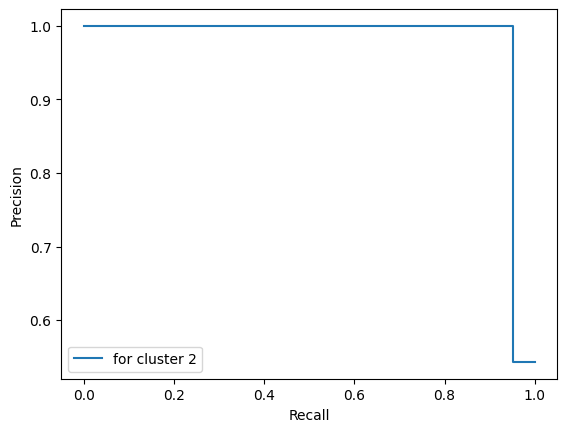

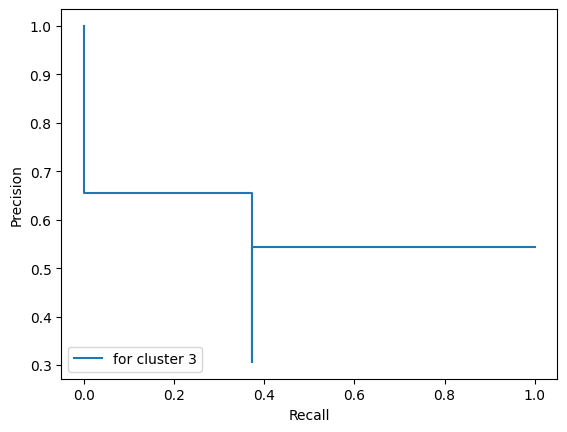

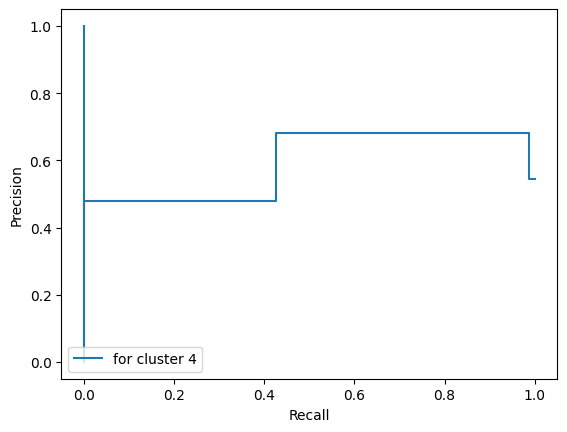

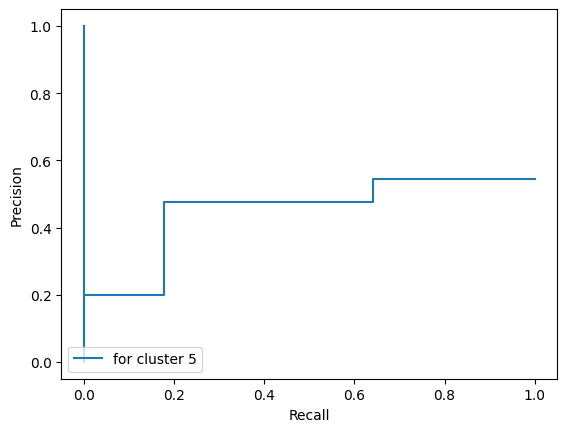

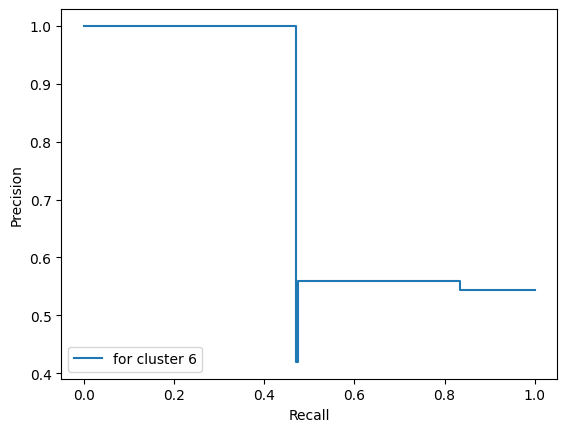

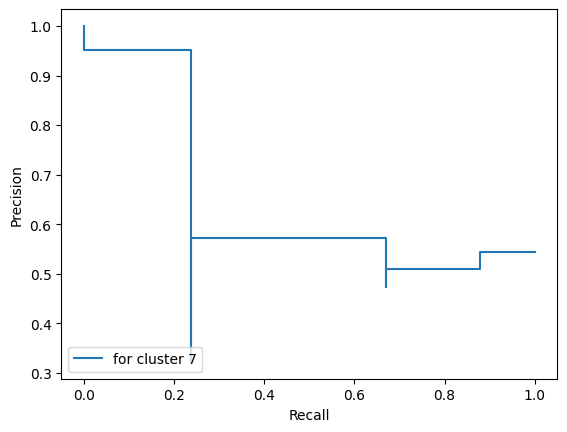

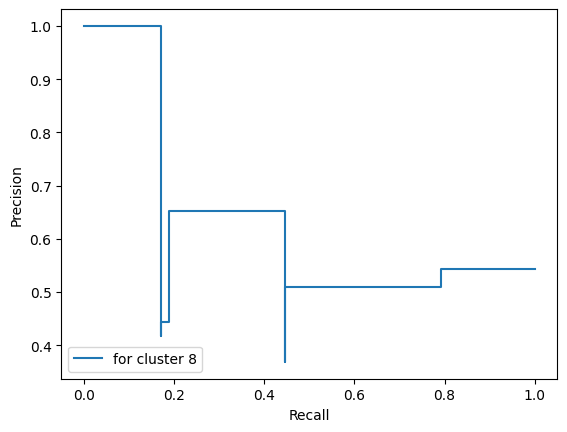

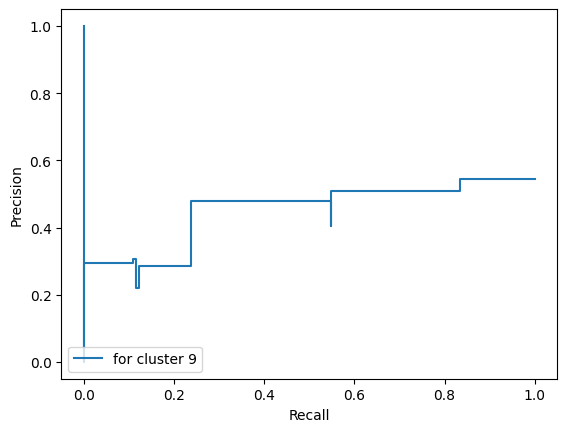

In [3]:
from traitlets.config import List
from sklearn.metrics.cluster import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import PrecisionRecallDisplay
import warnings
warnings.filterwarnings("ignore")
from traitlets.config import List
from sklearn.metrics.cluster import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import PrecisionRecallDisplay
import warnings
warnings.filterwarnings("ignore")
# Extract features: Feature extraction is one of the crucial
# steps to obtain an efficient representation of input patterns
X = data.iloc[:, :].values 
WCSS=[]
for k in range(2,10):
  #create K-means model
  Kmeans=KMeans(n_clusters=k, max_iter=1000)
  #train the model using the dataset
  Kmeans.fit(X)
  #evaluate the model
  lables =Kmeans.predict(X)
  #claculate Silhouette coefficient score for each number of clustrs 
  score =silhouette_score(X,lables, metric='euclidean')
  print("K"+str(k)+" Silhouette coefficient score: " +str(score))
  #claculate WCSS for each number of clusters
  WCSS.append(Kmeans.inertia_)
  print("K"+str(k)+" WCSS: " +str(WCSS[k-2]))
  #claculate and Plot Precision Recall Curve using predictions from a binary classifier.
  from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
  precision, recall, _ = precision_recall_curve(class_label, lables)
  PrecisionRecallDisplay(precision=precision, recall=recall).plot(ax=None, name=f'for cluster {k}')

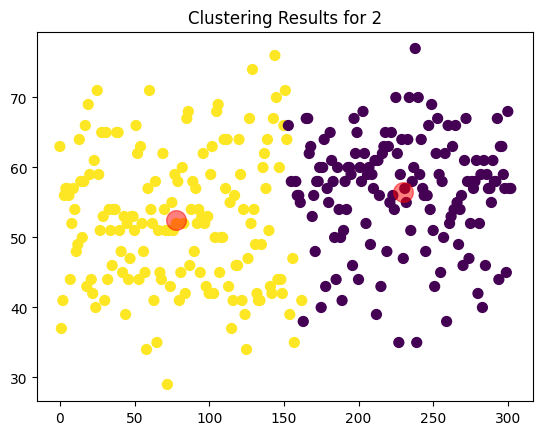

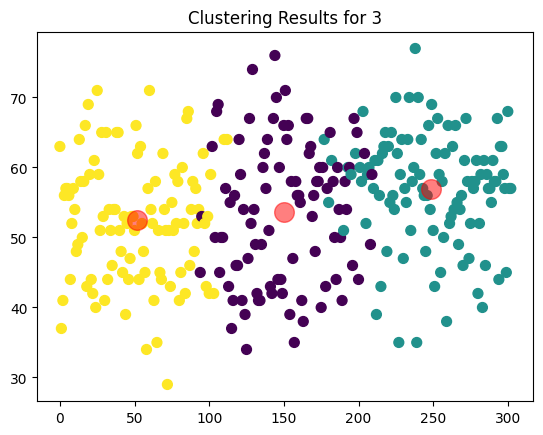

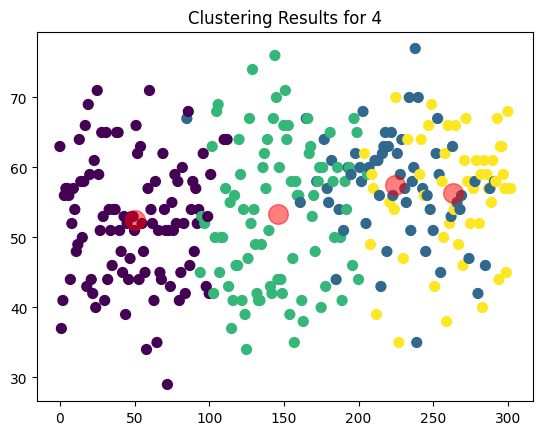

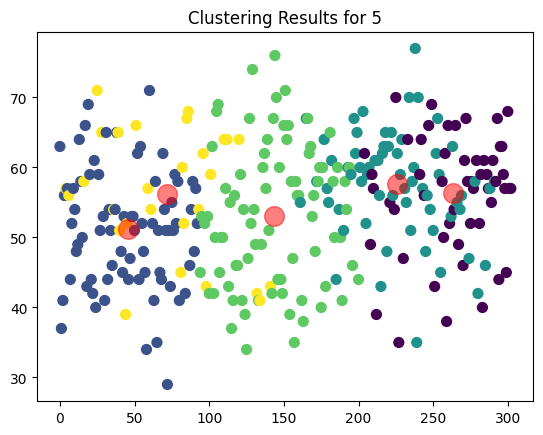

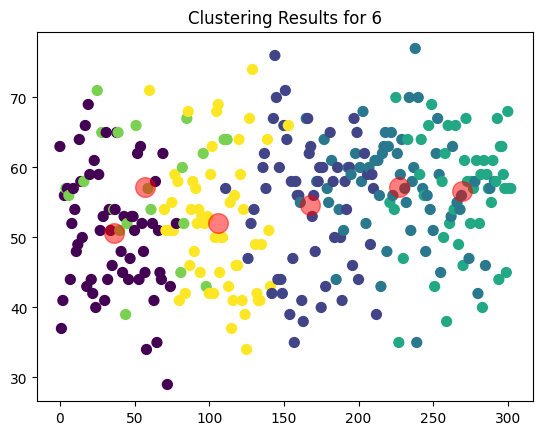

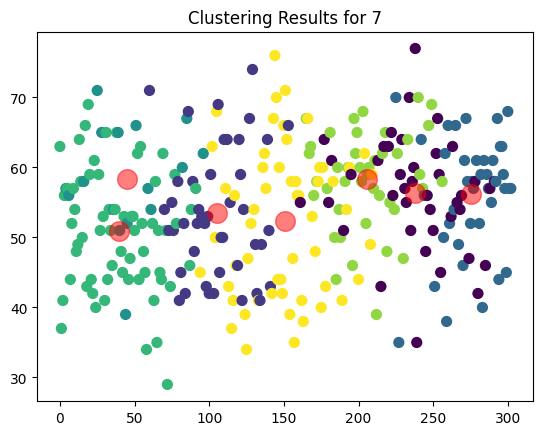

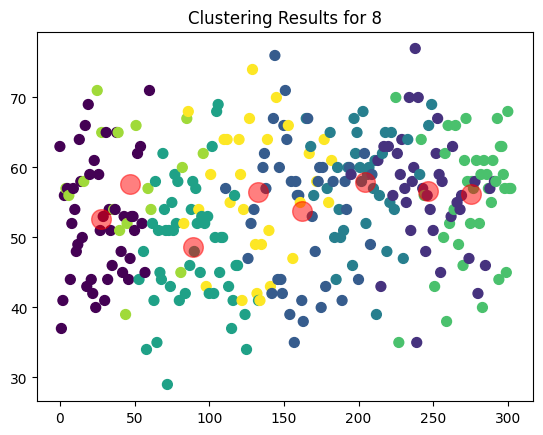

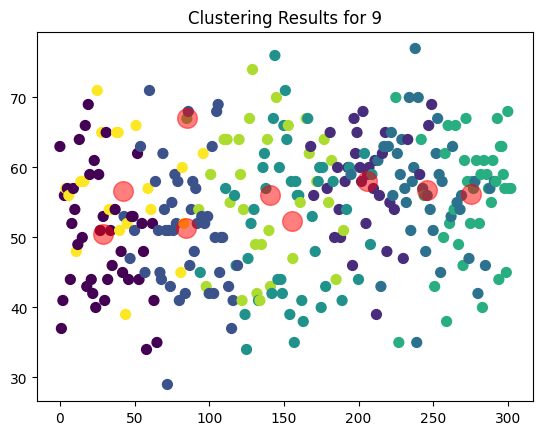

In [4]:
from sklearn.cluster import KMeans
for k in range(2,10):
#plot the result of each clustr
  Kmeans=KMeans(n_clusters=k, max_iter=1000)
  #train the model using the dataset
  Kmeans.fit(X)
  lables =Kmeans.predict(X)
  plt.scatter(X[:, 0], X[:, 1], c= lables, s=50, cmap='viridis')
  plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
  plt.title('Clustering Results for '+str(k))
  plt.show()

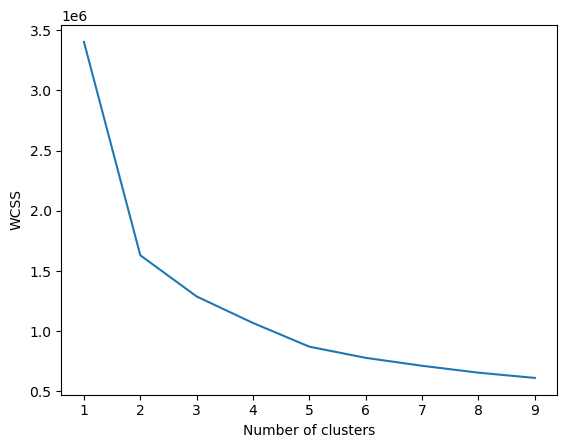

In [24]:
# plot the elbow diagram by using number of cluster and WCSS
plt.figure()
plt.plot(range(1, 10), WCSS)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
for i in [2,3,5]:
  fig, ax = plt.subplots(figsize=(6,4))
  #create KMeans instanc for different number of clusters
  km= KMeans(n_clusters=i, init="k-means++", max_iter=1000, random_state=1)
  q, mod= divmod(i, 2)
  #create SilhouetteVisualizer instance with KMeans instane and Fit the visualizer
  ves=silhouette_visualizer(km, X, colors='yellowbrick')
  ves.show()
  # the silhouette_visualizer works with 3.4 and later verion 

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
elb_visualizer = KElbowVisualizer(Kmeans, k=(1,10))
elb_visualizer.fit(X)    
elb_visualizer.show()